# Importing the libraries

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

Using TensorFlow backend.


# Loading the dataset

In [0]:
df = pd.read_csv("drive/My Drive/poster/sp1/normalized_energy_efficiency_dataset.csv")

In [0]:
df

,Unnamed: 0,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0,0.98,0.000000,0.285714,0.000000,7.0,2,0.0,0,15.55,21.33
1,1,0.98,0.000000,0.285714,0.000000,7.0,3,0.0,0,15.55,21.33
2,2,0.98,0.000000,0.285714,0.000000,7.0,4,0.0,0,15.55,21.33
3,3,0.98,0.000000,0.285714,0.000000,7.0,5,0.0,0,15.55,21.33
4,4,0.90,0.166667,0.428571,0.111111,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...,...
763,763,0.64,0.916667,0.571429,1.000000,3.5,5,0.4,5,17.88,21.40
764,764,0.62,1.000000,0.714286,1.000000,3.5,2,0.4,5,16.54,16.88
765,765,0.62,1.000000,0.714286,1.000000,3.5,3,0.4,5,16.44,17.11
766,766,0.62,1.000000,0.714286,1.000000,3.5,4,0.4,5,16.48,16.61


# Creating the Random Forest for heating load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (heating load) como la que queremos predecir
'''
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X.shape

(768, 8)

In [0]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([3. , 2. , 2. , 0. , 1. , 2. , 2. , 2. , 3. , 4. , 0. , 1. , 5. ,
       2. , 5. , 4. , 3. , 1. , 4.2, 2. , 3. , 1.8, 3. , 2. , 0. , 2. ,
       4.4, 5. , 1. , 5. , 5. , 3. , 3. , 2. , 2.7, 3. , 3. , 5. , 1.5,
       0. , 3. , 2. , 1. , 3. , 0. , 2.9, 5. , 3. , 4. , 4. , 2. , 2. ,
       4. , 5. , 4. , 1. , 0. , 1. , 4. , 4. , 3. , 2. , 3. , 5. , 1. ,
       3. , 2. , 5. , 5. , 3. , 2.9, 4. , 5. , 2. , 4. , 2. , 3.5, 5. ,
       4.2, 1. , 2. , 3. , 1. , 5. , 5. , 2. , 5. , 0. , 4. , 2.2, 2. ,
       5. , 1. , 0.8, 1. , 1. , 3. , 2. , 0. , 3. , 3. , 3. , 0. , 1. ,
       5. , 4. , 5. , 4. , 1. , 0. , 5. , 4. , 2. , 3. , 3. , 5. , 5. ,
       5. , 5. , 5. , 5. , 2. , 1. , 2. , 3. , 4. , 4. , 3. , 4. , 5. ,
       1. , 0.7, 4. , 3. , 5. , 0. , 4. , 0.7, 5. , 3. , 1. , 1. , 4. ,
       1. , 1. , 3.1, 1. , 1. , 3. , 4. , 5. , 4. , 4.2, 2. ])

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_heat = pd.DataFrame()

In [0]:
df_heat['original_values'] = y_test.flatten()
df_heat['Predicted_Values'] = y_pred

In [0]:
df_heat

,original_values,Predicted_Values
0,3,3.0
1,2,2.0
2,2,2.0
3,0,0.0
4,1,1.0
...,...,...
149,4,4.0
150,5,5.0
151,4,4.0
152,5,4.2


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_heat = mean_squared_error(df_heat['original_values'], df_heat['Predicted_Values'])
mse_heat

0.015584415584415584

In [0]:
# Calculamos el Mean Absolute Error
mae_heat = mean_absolute_error(df_heat['original_values'], df_heat['Predicted_Values'])
mae_heat

0.03246753246753247

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_heat)
root_mean_squared_error

0.12483755678647185

Text(0, 0.5, 'Heating Load')

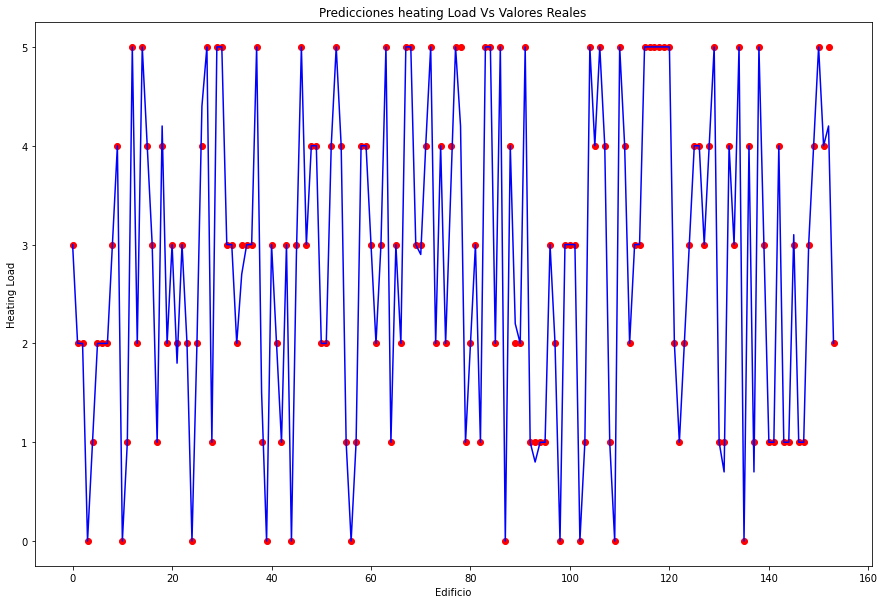

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.plot(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

Text(0, 0.5, 'Heating Load')

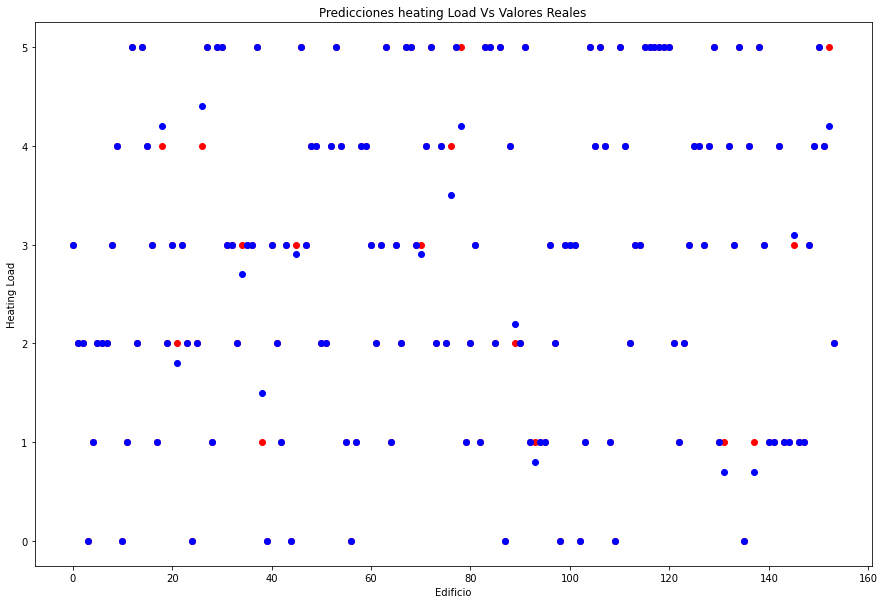

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.scatter(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

# Creating the ensemble for cooling load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (cooling load) como la que queremos predecir
'''
X_cooling= df.iloc[:, 0:8].values
y_cooling = df.iloc[:, 9:10].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(X_cooling, y_cooling, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X_cooling.shape

(768, 8)

In [0]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
cooling_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
cooling_regressor.fit(X_train_cooling, y_train_cooling)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
# Predicting the Test set results
y_pred_cooling = cooling_regressor.predict(X_test_cooling)
y_pred_cooling

array([15.197 , 10.386 , 35.891 , 17.016 , 32.435 , 29.16  , 28.427 ,
       29.132 , 28.912 , 23.209 ,  6.4172, 42.68  , 11.521 , 41.862 ,
       41.11  , 25.688 , 10.662 , 29.333 , 14.362 , 12.393 , 12.792 ,
       32.742 , 10.678 , 39.426 ,  6.1246, 14.612 , 13.14  , 13.913 ,
       10.697 , 39.584 , 12.93  , 12.938 , 41.809 , 12.938 , 28.58  ,
       36.829 , 14.183 , 37.771 , 17.126 , 10.563 , 11.524 , 39.637 ,
       14.525 , 25.668 , 19.154 , 24.284 , 10.704 , 12.818 , 28.424 ,
       31.84  , 32.588 , 12.954 , 32.906 , 15.139 , 36.851 , 10.389 ,
       17.777 , 27.077 , 38.937 , 14.532 , 14.945 , 12.415 , 32.51  ,
       10.41  , 12.622 , 11.943 , 39.212 , 11.207 , 26.502 , 39.433 ,
       32.725 , 10.675 , 23.88  , 17.106 , 15.28  , 25.809 , 32.604 ,
       39.106 , 32.665 , 14.562 , 35.74  , 28.995 , 11.683 , 14.46  ,
       29.004 , 25.779 , 24.188 , 29.67  , 13.135 , 17.047 , 14.474 ,
       26.335 , 12.414 , 24.452 , 40.196 , 16.819 , 29.05  , 14.552 ,
        8.026 , 36.6

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_cooling = pd.DataFrame()

In [0]:
df_cooling['original_values'] = y_test_cooling.flatten()
df_cooling['Predicted_Values'] = y_pred_cooling

In [0]:
df_cooling

,original_values,Predicted_Values
0,15.18,15.197
1,10.32,10.386
2,37.26,35.891
3,16.95,17.016
4,32.26,32.435
...,...,...
149,14.33,14.144
150,28.15,28.454
151,11.33,11.424
152,13.86,14.460


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_cooling = mean_squared_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mse_cooling

0.3948979870129872

In [0]:
# Calculamos el Mean Absolute Error
mae_cooling = mean_absolute_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mae_cooling

0.4063688311688313

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_cooling)
root_mean_squared_error

0.6284090920833236

Text(0, 0.5, 'Cooling Load')

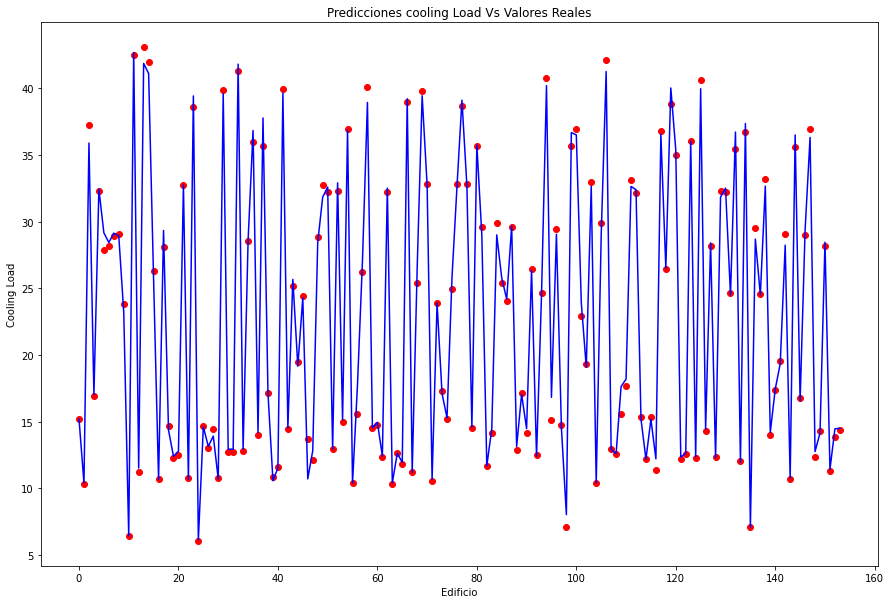

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.plot(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')

Text(0, 0.5, 'Cooling Load')

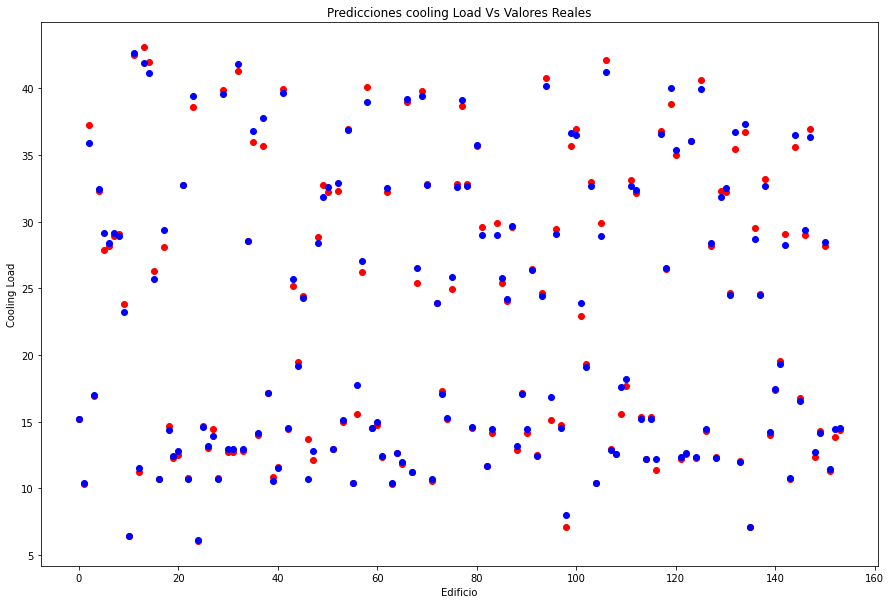

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.scatter(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')